In [6]:
#IMPORTING THE LIB

In [7]:
#importing the required lib
import pandas as pd          #---------->used to load the dataset
import numpy as np           #---------->used for performing mathematical and logical operations 
import matplotlib.pyplot as plt  #------->this lib is used for Visualization

In [8]:
#DATA PROCESSING

In [9]:
#READING THE UCI WINE QUALITY DATASET USING THE PANDAS AND PRINTING THE TOP 5 VALUES USING HEAD() FUNCTION 

In [10]:
data = pd.read_csv("/content/winequalityN.csv")
data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
#USING info() WE UNDERSTAND THE DTYPE, COLUMNS N RANGE OF DATA ETC;

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
#CHECKING FOR MISSING VALUES USING .isnull() METHOD/FUNCTION.
#BY USING THE .sum() TO GET THE TOTAL NO. OF MISSING VALUES IN THE RESPECTED COLUMN.

In [14]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

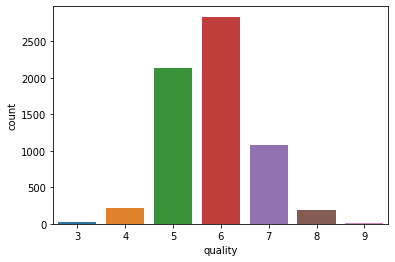

In [15]:
import seaborn as sns
sns.countplot(x ='quality', data = data)

In [16]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

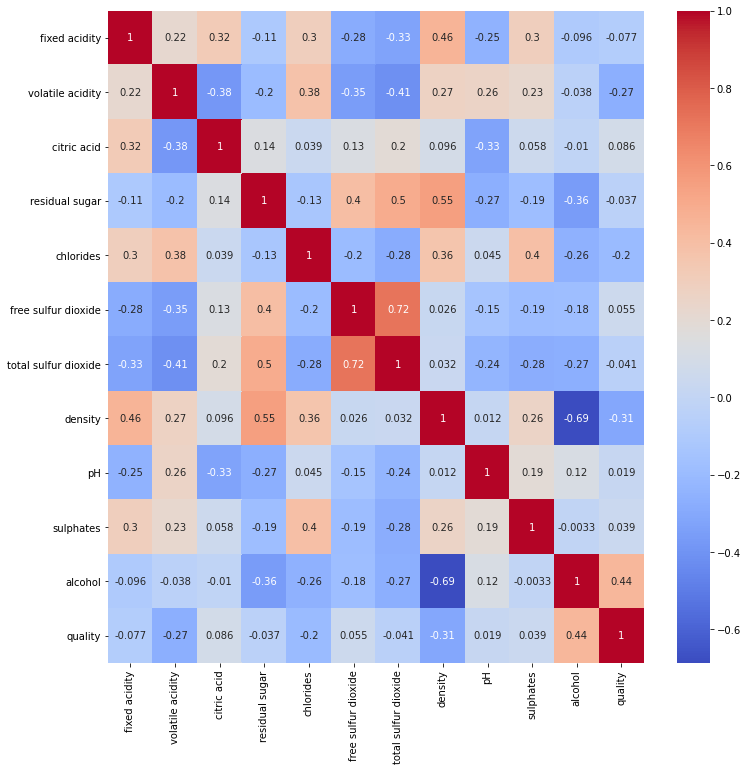

In [17]:
plt.figure(figsize=(12,12))
cor = data.corr(method='pearson')
sns.heatmap(cor,annot=True,cmap=plt.cm.coolwarm)
plt.show()

In [18]:
data_data = []
for x in data.quality:
  if x<=5:
     data_data.append(0)
  else:
     data_data.append(1)

In [19]:
data['target'] = data_data


In [20]:
data.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [21]:
data['target'].value_counts()

1    4113
0    2384
Name: target, dtype: int64

In [22]:
#HANDLING THE MISSING VALUES USING IMPUTER LIB OF SKLEARN

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(data.iloc[ :, 1:11])
data.iloc[ :, 1:11] = imputer.transform(data.iloc[ :, 1:11])

In [24]:
train_data = pd.DataFrame(data=data)

In [25]:
train_data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [26]:
train_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [27]:
#handling catagorical data


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
train_data= np.array(ct.fit_transform(train_data))

In [29]:
train_data1 = pd.DataFrame(data=train_data)

In [30]:
train_data1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1.0
1,0.0,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1.0
2,0.0,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1.0
3,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0
4,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1.0


In [31]:
x= train_data1.iloc[:, :-2].values
y = train_data1.iloc[:, -1].values

In [32]:
X = pd.DataFrame(data = x)

In [33]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0.0,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0.0,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [34]:
Y = pd.DataFrame(data = y)

In [35]:
print(Y)

        0
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
6492  0.0
6493  1.0
6494  1.0
6495  0.0
6496  1.0

[6497 rows x 1 columns]


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.571367,0.571367,-0.167159,-0.423564,0.284245,3.206977,-0.315222,0.815565,0.959976,2.102214,-1.359665,-0.545959,-1.418558
1,-0.571367,0.571367,-0.707427,-0.241232,0.146523,-0.808136,-0.201027,-0.931107,0.287618,-0.232332,0.508045,-0.277064,-0.831615
2,-0.571367,0.571367,0.681835,-0.362786,0.559689,0.306005,-0.172479,-0.029599,-0.331660,0.134525,0.259017,-0.613183,-0.328521
3,-0.571367,0.571367,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219
4,-0.571367,0.571367,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
model_df = DecisionTreeClassifier()
model_df.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
y_pred_df_train = model_df.predict(X_train)
print(accuracy_score(y_train,y_pred_df_train))

1.0


In [70]:
y_pred_df = model_df.predict(X_test)

In [71]:
print(accuracy_score(y_test,y_pred_df))

0.7656410256410257


In [76]:
cm1 = confusion_matrix(y_test, y_pred_df)
print(cm1)

[[497 238]
 [219 996]]


In [72]:
from sklearn.ensemble import RandomForestClassifier
model_2_rf = RandomForestClassifier(oob_score = True,n_jobs = 1,random_state = 1,n_estimators= 100)
model_2_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [73]:
y_pred_rf_train = model_2_rf.predict(X_train)
print(accuracy_score(y_train,y_pred_rf_train))

1.0


In [74]:
y_pred_rf_test = model_2_rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf_test))

0.8148717948717948


[[ 509  226]
 [ 135 1080]]


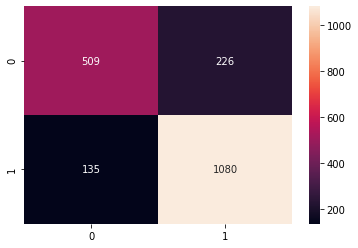

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_test)
print(cm)
sns.heatmap(cm,annot=True,fmt='.0f')

In [77]:
from sklearn.linear_model import LogisticRegression
model_3_lr = LogisticRegression()
model_3_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred_lr_train = model_3_lr.predict(X_train)
print(accuracy_score(y_train,y_pred_lr_train))

0.745546514185177


In [79]:
y_pred_lr_test = model_3_lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr_test))

0.7369230769230769


In [80]:
cm2 = confusion_matrix(y_test, y_pred_lr_test)
print(cm2)

[[ 410  325]
 [ 188 1027]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier
model_4_knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
model_4_knn.fit(X_train, y_train)
                                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
y_pred_knn_train = model_4_knn.predict(X_train)
print(accuracy_score(y_train,y_pred_knn_train))

0.8385748845392567


In [82]:
y_pred_knn_test = model_4_knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn_test))

0.7451282051282051


In [83]:
cm4 = confusion_matrix(y_test, y_pred_knn_test)
print(cm4)

[[ 439  296]
 [ 201 1014]]


In [52]:
from sklearn.ensemble import AdaBoostClassifier
boost1 = AdaBoostClassifier(random_state = 1,n_estimators=100,learning_rate=1.0)
boost1.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [84]:
pred = boost1.predict(X_train)
print(accuracy_score(y_train,pred))

0.7904112601715417


In [85]:
pred_test = boost1.predict(X_test)
print(accuracy_score(y_test,pred_test))

0.7487179487179487


In [86]:
cm5 = confusion_matrix(y_test, pred_test)
print(cm5)

[[ 449  286]
 [ 204 1011]]


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
boost2 = GradientBoostingClassifier(n_estimators=100,max_depth=5)
boost2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
predict_train = boost2.predict(X_train)
print('\nTarget on train data',predict_train)


Target on train data [1. 1. 0. ... 1. 1. 0.]


In [88]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.8926764899934022


In [58]:
predict_test = boost2.predict(X_test)
print('\nTarget on train data',predict_test)


Target on train data [1. 0. 1. ... 1. 1. 0.]


In [87]:
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on train dataset : ', accuracy_test)


accuracy_score on train dataset :  0.7882051282051282
